In [2]:
import pandas as pd
from hanziconv import HanziConv

import jieba
import jieba.posseg as pseg
import jieba.analyse


import sys
from optparse import OptionParser
import pprint
from prettytable import PrettyTable

In [3]:
df = pd.read_csv(open('../data/df_small.csv'))

In [4]:
test_df = df.head(100)
len(df)

93011

In [3]:
fileTrainSeg = []

In [4]:
for i in range(len(df)):
    seg_list = jieba.cut(df['text'][i])  # 默认是精确模式
#     print("/".join(seg_list))
    fileTrainSeg.append([' '.join(list(jieba.cut(str(df['text'][i]),cut_all=False)))])
    if i % 50000 == 0 :
        print(i)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.923 seconds.
Prefix dict has been built succesfully.


0
50000


In [7]:
fileTrainSeg[:9]
len(fileTrainSeg)

93011

In [9]:
fileSegWordDonePath ='corpusSegDone.txt'
with open(fileSegWordDonePath,'wb') as fW:
    for i in range(len(fileTrainSeg)):
        fW.write(str(fileTrainSeg[i][0]).encode('utf-8'))
        fW.write('\n'.encode('utf-8'))

In [10]:
def PrintListChinese(list):
    for i in range(len(list)):
        print(list[i],)
PrintListChinese(fileTrainSeg[19])

蛤


In [11]:
import word2vec
# jieba分詞轉word2vec向量
word2vec.word2vec('corpusSegDone.txt', 'corpusWord2Vec.bin', size=300,verbose=True)

Starting training using file corpusSegDone.txt
Vocab size: 4440
Words in train file: 594092
Alpha: 0.000547  Progress: 98.15%  Words/thread/sec: 295.38k  

In [12]:
model = word2vec.load('corpusWord2Vec.bin')
# print(model.vectors)

In [13]:
for i in range(1000,1500):
    print(model.vocab[i])

截圖
留言
吹
不理
師
弟弟
484
兄弟
愛莉絲
努力
無
高中生
w
􀄟
Crying
With
Laughter
Girl
機器
一天
本來
;
痾
好遠
家
還以
嚇死
頭
還會
ﾉ
快樂
老大
按
b8
不約
は
感情
小弟
時
半夜
yo
沖
幻想
油膩
B
這些
黃
D
OAO
偷
ww
興趣
咧
信
以為
._.
學
這張
放
Ok
只要
叩
851575
0a
逆
Yee
常常
聲音
洗
|
路
世界
講
全家
男朋友
吵
公司
人生
塊
蔡
不好意思
炮
變
尿
一年
確定
普通
接受
真心
我想
煮
哥
還不睡
生活
結婚
分鐘
不見
中文
猜猜
呆
咪
回答
歐
der
載
懷孕
HI
認親
要來育
形狀
分手
有趣
●
嘖嘖
＠
變態
恐怖
弄
怪
生氣
一張
joe
9453
😍
證明
秘密
老師
倒
版
彈
ｴ
cc
shop
detail
社會
方便
下班
ㄡ
美
打架
考
推
唸
94
您好
附近
火字
ㄕ
兩
特別
唱
卍
禮拜
霸
0087
不定
那裡
二
蝦
自拍
ˇ
我來
中午
簡單
咦
禮貌
機
呦
JOE
有緣
晴軒
玩笑
拍拍
同一
lol
這我
交
不同
行
公分
注意
滿
不夠
਼
不算
小孩
好久
▄
耍
棒棒
休息
打工
️
真人
北部
推薦
我媽
勝利
Q
ㄔ
😏
幾
便
要給
瘋
男森
下去
腕力
́
求
ppt
劉詩婷
🙄
😬
Ｑ
＝
專業
年紀
竟然
aac
系統
肚子
我用
只會
沒辦法
下午
乖乖
有種
阿姨
覺
一群
操
98
某
鎮甲
建華
眼睛
飽
い
851582
369239386556143
1497813874
歌
清楚
粉
T
傻眼
😅
鬆
潛水
傻傻的
刺客
粉團
RyUHK
開車
變成
北
下次
謝
出現
汪汪
早點
開頭
系
怪怪的
剩
張
唱歌
密
嚇到
８
廢話
小時
肛
工具
你場
電影
癢
新竹
O
ㄥ
忘記
不管
差點
💕
壓力
Id
麻
欺負
男滾
紅豆餅
螳螂
正在
至少
嘿嘿
次
萬
話題
哪間
to
25
我先
帥哥
修
斬
早就
........
看起
喇
居然
沒聽過
葳葳
熊怪
🏻
吸
U
ん
勸
問號
大葉
清
考試
s
見面
━
symbols
氣
撐
駄
才能
傳貼
其他人
哼哼
男生女生
也好
趕快
那時候
願意
沒錯
未來
會不會
管理
衣服

In [14]:
model = word2vec.load('corpusWord2Vec.bin')
indexes = model.cosine(u'寶可夢') # 此字詞有出現在corpusWord2Vec.bin當中
for index in indexes[0]:
    print(model.vocab[index])

告白
文
最近
旁邊
無聊來
常常
我家
很會
外國
推


In [15]:
model = word2vec.load('corpusWord2Vec.bin')
indexes = model.cosine(u'壓力') # 此字詞有出現在corpusWord2Vec.bin當中
for index in indexes[0]:
    print(model.vocab[index])

梗
奇怪
影片
收到
電腦
瘋子
狂
好奇
胸部
成績


In [16]:
model = word2vec.load('corpusWord2Vec.bin')
indexes = model.cosine(u'交換') # 此字詞有出現在corpusWord2Vec.bin當中
for index in indexes[0]:
    print(model.vocab[index])

土城
運動
機場
聊聊
還能
大便
沉默
搜
別騙
小弟


In [17]:
index1,metrics1 = model.cosine(u'學生')
index2,metrics2 = model.cosine(u'聊天')
index3,metrics3 = model.cosine(u'社會')
index4,metrics4 = model.cosine(u'錢')
index5,metrics5 = model.cosine(u'性別')

In [80]:
import numpy as np
index01 = np.where(model.vocab == u'學生')
index02 = np.where(model.vocab == u'聊天')
index03 = np.where(model.vocab == u'社會')
index04 = np.where(model.vocab == u'錢')
index05 = np.where(model.vocab == u'性別')

In [82]:
index1 = np.append(index1,index01)
index2 = np.append(index2,index02)
index3 = np.append(index3,index03)
index4 = np.append(index4,index04)
index5 = np.append(index5,index05)

In [83]:
import numpy as np
# 視覺化套件
import matplotlib
import matplotlib.pyplot as plt
# 主成分因子
from sklearn.decomposition import PCA

In [84]:
rawWordVec = model.vectors
# 將原本300維向量空間降為2維
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)

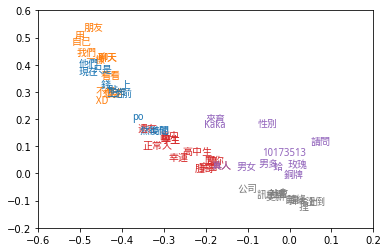

In [85]:
zhfont = matplotlib.font_manager.FontProperties(fname='wqy-microhei.ttc')
# 畫圖
fig = plt.figure()
ax = fig.add_subplot(111)
 
for i in index1:
    ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties=zhfont,color='C3')
for i in index2:
    ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties = zhfont,color= 'C1')
for i in index3:
    ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties=zhfont,color='C7')
for i in index4:
    ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties=zhfont,color='C0')
for i in index5:
    ax.text(X_reduced[i][0],X_reduced[i][1],model.vocab[i], fontproperties=zhfont,color='C4')
ax.axis([-0.6,0.2,-0.2,0.6])
plt.figure(figsize=(10,10))
plt.show()

In [12]:
def loadjieba():
  # 使用繁體中文詞庫
  jieba.set_dictionary('jieba_txt/dict.txt.big.txt')
  # 將自定義詞庫加進來
  jieba.load_userdict("jieba_txt/userdict.txt") 
  # 停用詞
  jieba.analyse.set_stop_words("jieba_txt/stop_words.txt")
  jieba.analyse.set_idf_path("jieba_txt/idf.txt.big.txt")

  # input_file = open(filename, 'r', encoding = utf8())

# def cutandcount(filename):
#   content = open(filename, 'rb').read()
#   seglist = jieba.cut(content, cut_all=False)
#   chars = set(' 0123456789()$,:.。，/􀆿\r\n')


# # 原本在字典裡的 斷詞 ＆ 頻率
# # 讀入 og_dict
#   with open('newdict.txt','rt') as f:
#     for line in f:
#       k = line.split('\t')[0]
#       v = line.split('\t')[1][:-1]
      
#       if k in og_dict.keys():
#         og_dict[k] = v+1
#       else:
#         og_dict[k] = v


# # 斷新的文字檔之後，把新的詞加入並把頻率設成 1
# # 舊的詞在 value +1
#   for word in seglist:
#     if any((c in chars) for c in word):
#       continue
#     else:
#       if not word in og_dict.keys():
#         og_dict[word] = 1
#       else:
#         og_dict[word] = int(og_dict[word]) + 1

#   print('it is NEW DATA !!!!!'+str(og_dict)+'!!!!')

#   with open('newdict.txt','w') as f:
#       for k,v in og_dict.items():
#         f.write(k+'\t'+str(v)+'\n')



In [19]:

df = df[df['text'].str.contains("https|Britain")== False]

In [20]:
df.head()
len(df)

91340

## Groupby by 'from' column 

In [76]:
grouped_data = df.groupby('from')['text'].apply(lambda x: '/'.join(x)).reset_index()
len(grouped_data)

1019

In [77]:
test= grouped_data.head(1000)

In [23]:
test.head()

,from,text
0,1000970273334199,找不到阿/安安/你有打LOL嗎/好吧，可以帶我嗎/安安/凸/Sor/嗯/約哪/有啊/你先約的...
1,1001070263323689,!?/唐寶寶/你那麼愛慕他ㄇ/嗨/先問問您期望本人的性別是?/了解/我是男的/抱歉沒有/請問...
2,1001967239901904,早/在床上發懶/爆/斷/魂/你在暗諷綠藻嘛/壞/話說我好餓ㄛ/窩不要這個qq/ㄋ早餐吃什麼/...
3,1003172849781848,甲/你要做我的0？/人生勝利組是不會來玩這個的/你一定不是c銘/也不是業王/葉你妹/被盜/其...
4,1003929993039131,吃噓/肥宅早/我們不是場外人/場外ㄈㄓ/我沒用了/安安/是喔/場外ㄈㄓ嗎/豪/斷/欸/在打手...


## split item

In [78]:
for i in range(len(test)):
    test.iloc[i][1] = test.iloc[i][1].split('/')

In [79]:
test.iloc[1][1]

['!?',
 '唐寶寶',
 '你那麼愛慕他ㄇ',
 '嗨',
 '先問問您期望本人的性別是?',
 '了解',
 '我是男的',
 '抱歉沒有',
 '請問您有玩龍族拼圖嗎？',
 'https:',
 '',
 'scontent.xx.fbcdn.net',
 'v',
 't34.0-12',
 '14101577_1023310441110034_14858244_n.jpg?_nc_ad=z-m&oh=23d63e6af2968219dad06f82b2302d79&oe=57C1383D',
 '我輸掉可以安慰我一下嗎',
 '如果你安慰我我會很開心的',
 '我好想尿尿',
 '有點髒',
 '而且要清很麻煩欸',
 '乾你怎麼知道我是男的',
 'What',
 'Are you kidding me',
 '真的嗎',
 '下次試試看',
 '我好想尿尿',
 '這是舒服的事 不用怕',
 'ㄋ會舒服啊ㄅ4我',
 '不是啊誰跟你說我要用舔ㄉㄌ',
 '用毛毛的棒子刷一刷R',
 '好啦我要去洗澡ㄌ我女友在找我\n妹妹ㄅㄅ',
 '我剛洗完澡 嗨',
 '真的假的啊',
 '有緣',
 '啊 可惜 我還沒開始吹',
 '好的',
 '你真貼心',
 '好那我先吹你等我一下XDD',
 '回來ㄌ',
 '紅豆餅是怎樣XDD',
 '會嗎哈哈哈',
 '哈哈哈哈別理他他怪人',
 '(拍拍',
 'https:',
 '',
 'scontent.xx.fbcdn.net',
 'v',
 't34.0-12',
 '14081054_1023352777772467_1944998201_n.gif?_nc_ad=z-m&oh=cc8c1ffc8ff8723c4a85f9754d9ed582&oe=57C21C3B',
 '超可愛的哈哈哈XDD',
 'https:',
 '',
 'scontent.xx.fbcdn.net',
 'v',
 't34.0-12',
 '14138358_1023356331105445_912709011_n.gif?_nc_ad=z-m&oh=595eb4e8706327fe8ed0bf20d5e0c28c&oe=57C115B2',
 '但看到桐人我必須噓!',
 '好啦別難過',
 '你難過我心痛',


In [24]:
jieba.set_dictionary('jieba_txt/dict.txt.big.txt')
stopwordset = set()
with open('jieba_txt/stop_words.txt','r',encoding='utf-8') as sw:
    for line in sw:
        stopwordset.add(line.strip('\n'))

for i in range(10,40):
    temp = list()
#     print('\n user'+str(i+1))
    for j in range(len(test.iloc[i][1])):
        seglist = jieba.cut((test.iloc[i][1])[j])
        for word in seglist:
            if word not in stopwordset:
                a = "/".join(seglist)
#                 print(a)
                temp.append(a)
#     print(temp)
                
print('done')
#     df['cut_list'][i] = temp
#         print("/ ".join(seglist))

Building prefix dict from /home/tp6han/gp_new/jieba_txt/dict.txt.big.txt ...
DEBUG:jieba:Building prefix dict from /home/tp6han/gp_new/jieba_txt/dict.txt.big.txt ...
Loading model from cache /tmp/jieba.u0ddb98113e9461fac3a7658d9e24e45e.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.u0ddb98113e9461fac3a7658d9e24e45e.cache
Loading model cost 1.593 seconds.
DEBUG:jieba:Loading model cost 1.593 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


done


In [80]:
top_10 = list()

In [81]:
chars = set(' 0123456789()?$,:.。，/􀆿\r\n')

In [82]:
jieba.set_dictionary('jieba_txt/dict.txt.big.txt')
stopwordset = set()
with open('jieba_txt/stop_words.txt','r',encoding='utf-8') as sw:
    for line in sw:
        stopwordset.add(line.strip('\n'))

import operator
for i in range(10,40):
    og_dict = dict()
    print('\n user'+str(i+1))
    if (len(test.iloc[i][1]))<10:
        continue
    for j in range(len(test.iloc[i][1])):
        seglist = jieba.cut((test.iloc[i][1])[j])
        for word in seglist:
            if word not in stopwordset:
                if any((c in chars) for c in word):
                    continue
                else:
                    if not word in og_dict.keys():
                        if word == " ":
                            continue
                        og_dict[word] = 1
                    else:
                        og_dict[word] = int(og_dict[word]) + 1
    a = sorted(og_dict.items(), key=operator.itemgetter(1),reverse=True)
#     print(a)
    if len(a) >= 10:
        row = []
        for x in range(10):
            print(a[x]) 
            row.append(a[x][0])

            
    top_10.append(row)

Building prefix dict from /home/tp6han/gp_new/jieba_txt/dict.txt.big.txt ...
DEBUG:jieba:Building prefix dict from /home/tp6han/gp_new/jieba_txt/dict.txt.big.txt ...
Loading model from cache /tmp/jieba.u0ddb98113e9461fac3a7658d9e24e45e.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.u0ddb98113e9461fac3a7658d9e24e45e.cache



 user11


Loading model cost 1.594 seconds.
DEBUG:jieba:Loading model cost 1.594 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


('_', 5)
('囉', 2)
('-', 2)
('！', 2)
('了', 1)
('png', 1)
('配對', 1)
('net', 1)
('聊天', 1)
('https', 1)

 user12
('_', 16)
('ㄇ', 13)
('=', 13)
('小妹', 12)
('ㄩ', 10)
('ㄉ', 10)
('ㄋ', 8)
('是', 7)
('ㄤ', 6)
('-', 6)

 user13
('_', 5)
('-', 2)
('Yo', 1)
('png', 1)
('net', 1)
('m', 1)
('https', 1)
('ㄇ', 1)
('ad', 1)
('nc', 1)

 user14

 user15
('_', 15)
('-', 6)
('English', 6)
('XD', 5)
('ん', 4)
('is', 4)
('net', 3)
('fbcdn', 3)
('=', 3)
('m', 3)

 user16

 user17
('的', 5)
('那', 4)
('約', 4)
('是', 4)
('照片', 4)
('不是', 4)
('嗎', 3)
('啊', 3)
('了', 3)
('要', 2)

 user18

 user19
('_', 85)
('=', 47)
('-', 34)
('&', 30)
('ad', 17)
('z', 17)
('scontent', 17)
('net', 17)
('fbcdn', 17)
('xx', 17)

 user20
('_', 10)
('啊', 8)
('這', 7)
('是', 7)
('小妹', 6)
('一家', 6)
('好', 6)
('在', 5)
('約', 5)
('浪漫', 4)

 user21
('_', 20)
('-', 8)
('=', 8)
('net', 4)
('m', 4)
('https', 4)
('nc', 4)
('ad', 4)
('n', 4)
('fbcdn', 4)

 user22
('嗨', 5)
('的', 3)
('女', 2)
('吧', 2)
('是', 2)
('男', 2)
('了', 1)
('愛要', 1)
('你好', 1)
('說', 1)

 

In [83]:
top_10

[['_', '囉', '-', '！', '了', 'png', '配對', 'net', '聊天', 'https'],
 ['_', 'ㄇ', '=', '小妹', 'ㄩ', 'ㄉ', 'ㄋ', '是', 'ㄤ', '-'],
 ['_', '-', 'Yo', 'png', 'net', 'm', 'https', 'ㄇ', 'ad', 'nc'],
 ['_', '-', 'English', 'XD', 'ん', 'is', 'net', 'fbcdn', '=', 'm'],
 ['的', '那', '約', '是', '照片', '不是', '嗎', '啊', '了', '要'],
 ['_', '=', '-', '&', 'ad', 'z', 'scontent', 'net', 'fbcdn', 'xx'],
 ['_', '啊', '這', '是', '小妹', '一家', '好', '在', '約', '浪漫'],
 ['_', '-', '=', 'net', 'm', 'https', 'nc', 'ad', 'n', 'fbcdn'],
 ['嗨', '的', '女', '吧', '是', '男', '了', '愛要', '你好', '說'],
 ['_', '=', '-', '&', 'ㄇ', 'ㄩ', 'm', 'net', '是', 'xx'],
 ['哈', '還女森', '好', '男森', '嗯', 'hi', '啊', '恩', '個資', 'ㄏ'],
 ['_', '=', '-', '&', 'ad', 'z', 'net', 'fbcdn', 'xx', 'scontent'],
 ['_', '-', '不要', '約', 'net', 'm', '浪漫', 'https', 'nc', 'ad'],
 ['=', '_', '真棒', '尛', '了', '-', '圖', '好', '私', 'cp'],
 ['場外', '是', '人', '哦', '嗎', '好', '怕', '意思', '有', '什麼'],
 ['_', '=', '-', '&', 'https', 'm', 'ad', 'net', 'fbcdn', 'xx'],
 ['是', '什麼', 'ㄇ', '跟', '約', '了',

In [19]:
# 將jieba的斷詞產出存檔
fileSegWordDonePath ='corpusSegDone.txt'
with open(fileSegWordDonePath,'w') as fW:
    for i in range(len(top_10)):
        fW.write(str(top_10[i]))
        fW.write('\n')
# 檢視斷詞jieba的結果
def PrintListChinese(list):
    for i in range(len(list)):
        print(list[i])
# PrintListChinese(top_10[8])



In [17]:
with open('vec.txt','w') as op:
    for i in range(len(top_10[2])):
        op.write(str(top_10[2][i]))
        op.write('\n')
def PrintListChinese(list):
    for i in range(len(list)):
        print(list[i])
        
        

In [20]:
import word2vec
# jieba分詞轉word2vec向量
word2vec.word2vec('corpusSegDone.txt', 'corpusWord2Vec.bin', size=300,verbose=True)

Starting training using file corpusSegDone.txt
Vocab size: 31
Words in train file: 493


In [22]:
model = word2vec.load('corpusWord2Vec.bin')
# print(model.vectors )
len(model.vectors)

31

In [23]:
type(model.vectors)

numpy.ndarray

In [24]:
a = model.vectors

In [26]:
from sklearn import cluster, datasets

kmeans_fit = cluster.KMeans(n_clusters = 3).fit(a)


In [27]:
cluster_labels = kmeans_fit.labels_
cluster_labels

array([2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0], dtype=int32)

In [29]:
for i in range(2,30):
    print(model.vocab[i])

'你',
'的',
'我',
'了',
['我',
'嗎',
'好',
'ㄇ',
'？',
['你',
'啊',
'約',
'有',
'不',
'ㄋ',
['的',
'嗨',
'沒',
'ㄩ',
'都',
'安安',
'什麼',
'也',
'ㄉ',
'阿',
'喔',
'都']
'ㄅ',


In [30]:
pd.DataFrame.from_records(top_10)

,0,1,2,3,4,5,6,7,8,9
0,ㄇ,小妹,ㄉ,ㄩ,ㄋ,是,ㄤ,場外,約,真
1,阿,+,Yo,人理,ㄩ,啥,三小,!,沒,不要
2,English,XD,is,ん,it,Who,Hi,ば,こ,は
3,的,那,照片,不是,是,約,了,嗎,啊,男
4,豪,棒,是,霸主,的,不,對,做,了,等
5,啊,是,這,一家,好,小妹,約,在,浪漫,嗎
6,嗨,的,男,女,吧,是,別悶,大聲,雙魚,請問
7,ㄩ,ㄇ,是,幹,安安,劍華,男,姿萱,野,閉嘴
8,哈,嗯,還女森,好,啊,hi,男森,的,方面,小
9,喔,是,ㄩ,的,ㄇ,嗎,尻,男,～,你好


In [8]:
from gensim import models
import gensim

In [9]:
sentences = models.word2vec.LineSentence("corpusSegDone.txt")

In [15]:
models.word2vec.Word2Vec?

In [21]:
model = models.word2vec.Word2Vec(sentences, size=1, window=5, min_count=5, workers=1)

In [22]:
model.wv.vocab


{'耶': <gensim.models.keyedvectors.Vocab at 0x7f36941a24e0>,
 '崴': <gensim.models.keyedvectors.Vocab at 0x7f36941bb198>,
 '企業': <gensim.models.keyedvectors.Vocab at 0x7f369418ac18>,
 '號碼': <gensim.models.keyedvectors.Vocab at 0x7f3694177208>,
 '很強': <gensim.models.keyedvectors.Vocab at 0x7f36941bb1d0>,
 '聊天室': <gensim.models.keyedvectors.Vocab at 0x7f3694177240>,
 '保證': <gensim.models.keyedvectors.Vocab at 0x7f369418cb38>,
 '生氣': <gensim.models.keyedvectors.Vocab at 0x7f36941a20b8>,
 '歪': <gensim.models.keyedvectors.Vocab at 0x7f3694177278>,
 '刷': <gensim.models.keyedvectors.Vocab at 0x7f36941bb208>,
 '金': <gensim.models.keyedvectors.Vocab at 0x7f3694161780>,
 '詞': <gensim.models.keyedvectors.Vocab at 0x7f369411fda0>,
 '難道': <gensim.models.keyedvectors.Vocab at 0x7f36941ce630>,
 '有些': <gensim.models.keyedvectors.Vocab at 0x7f36941a2080>,
 '神經': <gensim.models.keyedvectors.Vocab at 0x7f369411fd30>,
 '凍': <gensim.models.keyedvectors.Vocab at 0x7f36941326d8>,
 '？': <gensim.models.keyedvect

In [23]:
len(model['愛情'])

1

In [24]:
model['哈']

array([-3.23068333], dtype=float32)

In [70]:
jieba.set_dictionary('jieba_txt/dict.txt.big.txt')
stopwordset = set()
with open('jieba_txt/stop_words.txt','r',encoding='utf-8') as sw:
    for line in sw:
        stopwordset.add(line.strip('\n'))
        
        
        

In [71]:
import numpy as np
top10_vector = np.array([])

In [72]:
chars = set(' abcdefghijklmnopqrstuvwxyz0123456789()?$,:.。，-_&=/􀆿\r\n')

In [73]:
import operator
for i in range(5):
    og_dict = dict()
    print('\n user'+str(i+1))
    if (len(test.iloc[i][1]))<10:
        continue
    for j in range(len(test.iloc[i][1])):
        seglist = jieba.cut((test.iloc[i][1])[j])
        for word in seglist:
            if word not in stopwordset:
                if any((c in chars) for c in word):
                    continue
                else:
                    if not word in og_dict.keys():
                        if word == " ":
                            continue
                        og_dict[word] = 1
                    else:
                        og_dict[word] = int(og_dict[word]) + 1
    a = sorted(og_dict.items(), key=operator.itemgetter(1),reverse=True)
    print(a)
    if len(a) >= 10:
        row = np.array([])
        for x in range(10):
            print(a[x]) 
            if a[x][0] in model:
                show = model[a[x][0]]
                np.append(row,np.asarray(show),axis=0)
        print(row)
#             np.append(top10_vector,row,axis=0)

Building prefix dict from /home/tp6han/gp_new/jieba_txt/dict.txt.big.txt ...
DEBUG:jieba:Building prefix dict from /home/tp6han/gp_new/jieba_txt/dict.txt.big.txt ...
Loading model from cache /tmp/jieba.u0ddb98113e9461fac3a7658d9e24e45e.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.u0ddb98113e9461fac3a7658d9e24e45e.cache



 user1


Loading model cost 1.633 seconds.
DEBUG:jieba:Loading model cost 1.633 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


[('D', 7), ('C', 7), ('B', 7), ('哪', 4), ('安', 4), ('嗎', 3), ('好', 3), ('癢', 3), ('裡', 3), ('掰', 2), ('約', 2), ('有', 2), ('啊', 2), ('ㄅ', 2), ('ㄋ', 2), ('的', 2), ('L', 2), ('人', 2), ('凸', 2), ('打', 2), ('吧', 1), ('這', 1), ('先', 1), ('ㄨ', 1), ('ㄏ', 1), ('嗯', 1), ('遠', 1), ('皮', 1), ('啦', 1), ('又', 1), ('屌', 1), ('可', 1), ('不', 1), ('阿', 1), ('凹', 1), ('到', 1), ('輸', 1), ('幹', 1), ('住', 1), ('實', 1), ('了', 1), ('還', 1), ('魏', 1), ('米', 1), ('以', 1), ('潭', 1), ('入', 1), ('三', 1), ('帶', 1), ('小', 1), ('喔', 1), ('ㄐ', 1), ('ㄗ', 1), ('O', 1), ('新', 1), ('S', 1), ('找', 1), ('其', 1), ('超', 1), ('ㄌ', 1), ('竹', 1), ('龍', 1), ('懶', 1)]
('D', 7)
('C', 7)
('B', 7)
('哪', 4)
('安', 4)
('嗎', 3)
('好', 3)
('癢', 3)
('裡', 3)
('掰', 2)
[]

 user2
[('哈', 54), ('Q', 41), ('的', 34), ('是', 31), ('嗎', 22), ('不', 21), ('O', 20), ('可', 19), ('嗚', 18), ('有', 17), ('D', 16), ('麼', 16), ('好', 16), ('啊', 16), ('了', 13), ('也', 13), ('ㄇ', 13), ('會', 13), ('真', 12), ('沒', 12), ('C', 11), ('這', 11), ('心', 11), ('那', 10), ('還

In [57]:
top10_vector

array([], dtype=float64)

In [42]:
import numpy as np
np_vector = np.asarray(top10_vector)

In [36]:
np_vector


array([], dtype=float64)

In [37]:
np_vector[1].reshape((5,1))

IndexError: index 1 is out of bounds for axis 0 with size 0

In [18]:
from sklearn import cluster, datasets

# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# KMeans 演算法
kmeans_fit = cluster.KMeans(n_clusters = 3).fit(iris_X)

# 印出分群結果
cluster_labels = kmeans_fit.labels_
print("分群結果：")
print(cluster_labels)
print("---")

# 印出品種看看
iris_y = iris.target
print("真實品種：")
print(iris_y)

分群結果：
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
---
真實品種：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [19]:
iris_X.shape

(150, 4)

In [20]:
iris_X

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4